In [1]:
#                            virtual env: myEnv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
print(len(tf.config.list_physical_devices('GPU')))

0


In [ ]:
# PATH = f'D:\Development\machine_learning\PROJECTS\oral_cancer_project\datasets\images\preprocessing_images\processed_data'
# os.listdir(PATH)

Dividing data into train test split

In [15]:
dataset_dir =  '../oc_datasets/final_dataset/complete_augmented'
os.listdir(dataset_dir)

['cancer', 'non_cancer']

In [5]:

'''

classes = ['cancer', 'non_cancer']
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')


os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)


def create_class_dirs(base_dir, classes):
    for class_name in classes:
        os.makedirs(os.path.join(base_dir, class_name), exist_ok=True)

create_class_dirs(train_dir, classes)           #training
create_class_dirs(val_dir, classes)             #validation


def split_and_copy_files(class_name, class_dir, train_dir, val_dir, test_size=0.2, random_state=42):
    images = os.listdir(class_dir)
    train_images, val_images = train_test_split(images, test_size=test_size, random_state=random_state)
    
    # Move training images
    for image in train_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(train_dir, class_name, image)
        shutil.copyfile(src_path, dst_path)
    
    # Move validation images
    for image in val_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(val_dir, class_name, image)
        shutil.copyfile(src_path, dst_path)

# Split and copy files for each class
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    split_and_copy_files(class_name, class_dir, train_dir, val_dir)

print("Dataset split into training and validation sets.")

'''

Dataset split into training and validation sets.


In [28]:
train_dir = f'../oc_datasets/final_dataset/train_test_split/train'
val_dir = f'../oc_datasets/final_dataset/train_test_split/val'
os.listdir(train_dir)

['cancer', 'non_cancer']

In [29]:
#train test stats
def count_images(directory_path):
    count = 0
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                count += 1

    return count

In [30]:
print(f"number of images in training : {count_images(train_dir)}")
print(f"number of images in testing : {count_images(val_dir)}")

number of images in training : 6960
number of images in testing : 1740


In [31]:
train_datagen = ImageDataGenerator(
    rescale = 1.255,
    rotation_range = 20,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range = 20,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    ) 


In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (224, 224),
    batch_size = 16, 
    class_mode = 'binary'
)

Found 6960 images belonging to 2 classes.
Found 1740 images belonging to 2 classes.


In [10]:
'''
def VGG_19_implementation(input_shape=(224, 224, 3), num_classes=1):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))      
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))                               #same
    # model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))                                                 

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))   
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))                     

    # Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))    
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))     
    # model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))                        

    # Block 4
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))      
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))        #same
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))                         

    # Block 5
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))       
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model
'''

"\ndef VGG_19_implementation(input_shape=(224, 224, 3), num_classes=1):\n    model = models.Sequential()\n\n    # Block 1\n    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))      \n    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))                               #same\n    # model.add(layers.Activation('relu'))\n    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))                                                 \n\n    # Block 2\n    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  \n    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))   \n    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))                     \n\n    # Block 3\n    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))    \n    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))     \n    # model.add(layers.Conv2D(256, (3, 3), activation='relu', paddin

In [33]:
from tensorflow.keras import models, layers

In [34]:
def vgg16_scratch(input_shape=(224, 224, 3), num_classes=1):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(4096))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model

In [35]:
model = vgg16_scratch()

c:\Users\Mudasir\anaconda3\envs\myEnv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss=binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 256)    │         1,02

 Total params: 134,314,305 (512.37 MB)

 Trainable params: 134,289,473 (512.27 MB)

 Non-trainable params: 24,832 (97.00 KB)

In [38]:
checkpoint = ModelCheckpoint('vgg16_oral_cancer.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max',verbose=1)

In [32]:
# %pip install pillow

  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
import PIL
from tensorflow.keras.preprocessing.image import load_img

In [40]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10


c:\Users\Mudasir\anaconda3\envs\myEnv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


435/435 ━━━━━━━━━━━━━━━━━━━━ 2183s 5s/step - accuracy: 0.5926 - loss: 0.8630 - val_accuracy: 0.5451 - val_loss: 0.7391
Epoch 2/10


c:\Users\Mudasir\anaconda3\envs\myEnv\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6387
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 1540s 4s/step - accuracy: 0.6644 - loss: 0.6661 - val_accuracy: 0.4543 - val_loss: 0.6946
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.6954
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 1535s 4s/step - accuracy: 0.6970 - loss: 0.6187 - val_accuracy: 0.5440 - val_loss: 0.7079
Epoch 6/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.5434
Epoch 7/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 1584s 4s/step - accuracy: 0.7057 - loss: 0.5914 - val_accuracy: 0.5463 - val_loss: 0.6915
Epoch 8/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7074
Epoch 9/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 1560s 4s/step - accuracy: 0.7001 - 

In [ ]:
# best_model = tf.keras.models.load_model('vgg16_oral_cancer.h5')      # i ll save this model


In [49]:
model.save('vgg_16_scratch.keras')

In [45]:
test_loss, test_accuracy = model.evaluate(val_generator, steps = val_generator.samples // val_generator.batch_size)
print(f'Test accuracy: {test_accuracy:.2f}')

108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 718ms/step - accuracy: 0.5552 - loss: 0.8213
Test accuracy: 0.55


In [46]:
import matplotlib.pyplot as plt


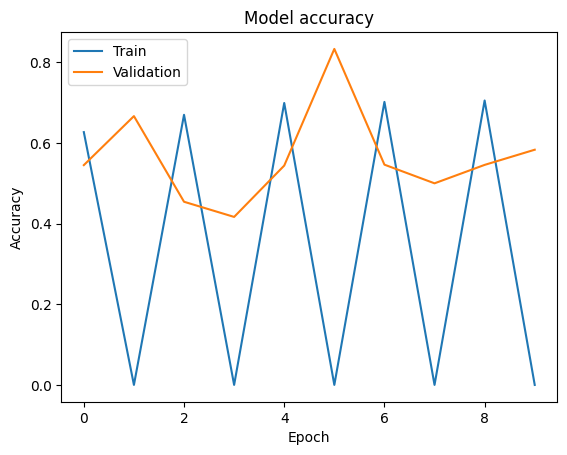

In [47]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

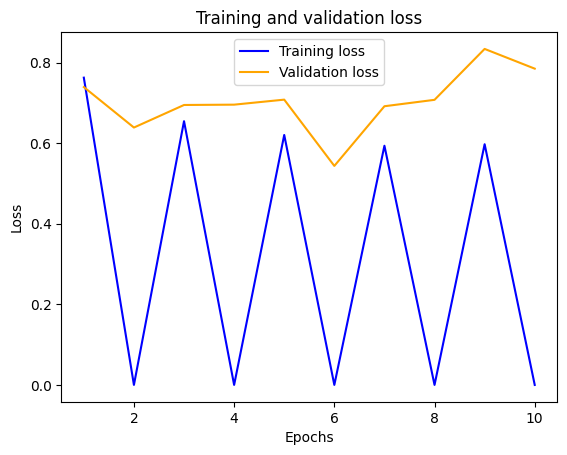

In [51]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b-', label='Training loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to plot loss curves
plot_loss(history)

In [53]:
from sklearn.metrics import confusion_matrix
import numpy as np

109/109 ━━━━━━━━━━━━━━━━━━━━ 79s 725ms/step


NameError: name 'itertools' is not defined

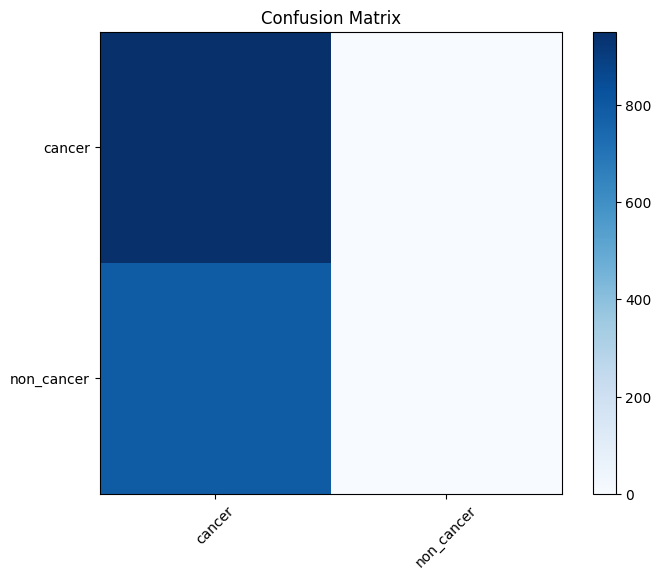

In [55]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot loss curves
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Get predictions on validation data
val_pred = model.predict(val_generator)
val_pred_classes = np.round(val_pred)

# Get true labels
val_true_classes = val_generator.classes

# Plot confusion matrix
plot_confusion_matrix(val_true_classes, val_pred_classes, classes=["cancer", "non_cancer"])

# Plot loss curves
plot_loss(history)

In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes for the test dataset
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)  # Assuming binary classification with threshold 0.5

# Get true classes
true_classes = test_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



NameError: name 'test_generator' is not defined

In [ ]:
#ploting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label=['Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
